# Libreries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Splits

In [2]:
X = pd.read_csv('/content/X_features.csv')
y = pd.read_csv('/content/y_target.csv')

print(X.shape, y.shape)

(115491, 18) (115491, 1)


# Función que valida Nan

In [3]:
def validar_X_y(X, y, target_name="is_profitable"):
    """
    Valida y sincroniza X e y antes de modelar.

    Parámetros:
    -----------
    X : pd.DataFrame
        Dataset de características.
    y : pd.Series o pd.DataFrame
        Target a predecir.
    target_name : str
        Nombre de la columna de target si es un DataFrame.

    Retorna:
    --------
    X_val : pd.DataFrame
        Dataset de características limpio.
    y_val : pd.Series
        Target limpio.
    """

    # Si y es un DataFrame, convertir a Series
    if isinstance(y, pd.DataFrame):
        if target_name in y.columns:
            y = y[target_name]
        else:
            raise ValueError(f"Target '{target_name}' no encontrado en DataFrame y.")

    # Concatenar X e y
    df_temp = pd.concat([X, y], axis=1)

    # Guardar shape original
    shape_original = df_temp.shape

    # Dropear filas con NaNs
    df_temp = df_temp.dropna()

    # Chequear cambios
    shape_final = df_temp.shape
    if shape_original != shape_final:
        print(f"Se eliminaron {shape_original[0] - shape_final[0]} filas por NaNs.")
    else:
        print("No se encontraron NaNs. X e y están limpios y sincronizados.")

    # Separar de nuevo
    X_val = df_temp.drop(y.name, axis=1)
    y_val = df_temp[y.name]

    # Validar shapes
    assert X_val.shape[0] == y_val.shape[0], "Error: X e y aún no tienen el mismo número de filas."

    return X_val, y_val

In [4]:
# Llamada a la función para validar y limpiar
X, y = validar_X_y(X, y)

Se eliminaron 1 filas por NaNs.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Tamaño de entrenamiento:', X_train.shape)
print('Tamaño de test:', X_test.shape)

Tamaño de entrenamiento: (92392, 18)
Tamaño de test: (23098, 18)


# Entrenamiento con Regresión Logistica

In [6]:
logreg= LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [7]:
y_pred= logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

Accuracy: 0.9799
Precision: 0.8664
Recall: 0.6185
F1 Score: 0.7217
ROC AUC Score: 0.9893
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     22123
         1.0       0.87      0.62      0.72       975

    accuracy                           0.98     23098
   macro avg       0.92      0.81      0.86     23098
weighted avg       0.98      0.98      0.98     23098



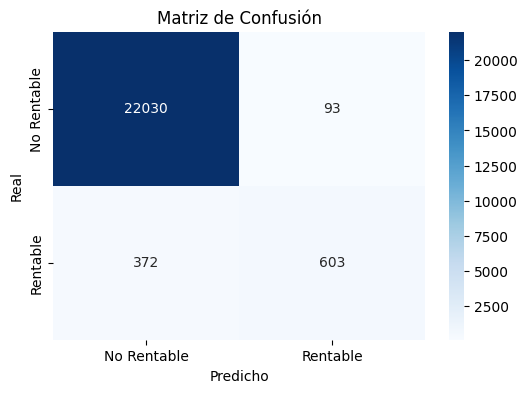

In [8]:
#Evaluación

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred_proba), 4))

print(classification_report(y_test, y_pred))

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No Rentable', 'Rentable'], yticklabels=['No Rentable', 'Rentable'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Entrenamiento con balanceo de clases

In [9]:
logreg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [10]:
y_pred_balanced = logreg_balanced.predict(X_test)
y_pred_proba_balanced = logreg_balanced.predict_proba(X_test)[:,1]

Resultados con class_weight='balanced':
Accuracy: 0.958
Precision: 0.5013
Recall: 0.9897
F1 Score: 0.6655
ROC AUC Score: 0.9916

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     22123
         1.0       0.50      0.99      0.67       975

    accuracy                           0.96     23098
   macro avg       0.75      0.97      0.82     23098
weighted avg       0.98      0.96      0.96     23098



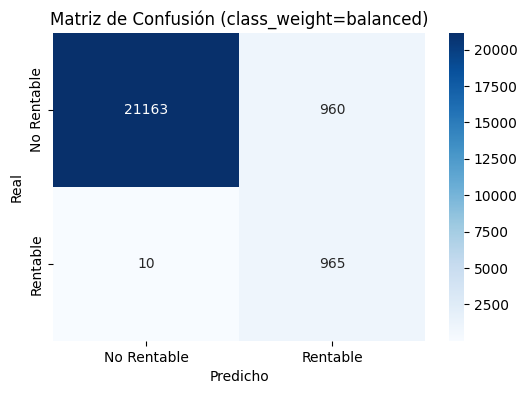

In [11]:
#Evaluación

print("Resultados con class_weight='balanced':")
print("Accuracy:", round(accuracy_score(y_test, y_pred_balanced), 4))
print("Precision:", round(precision_score(y_test, y_pred_balanced), 4))
print("Recall:", round(recall_score(y_test, y_pred_balanced), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_balanced), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred_proba_balanced), 4))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_balanced))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_balanced)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No Rentable', 'Rentable'], yticklabels=['No Rentable', 'Rentable'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión (class_weight=balanced)')
plt.show()

# Entrenamiento ajustando el threshold

In [12]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]  # (el modelo original, sin balanced)

# Definir nuevo threshold
nuevo_threshold = 0.4

# Aplicar el nuevo threshold manualmente
y_pred_threshold = (y_pred_proba >= nuevo_threshold).astype(int)

Resultados con threshold = 0.4
Accuracy: 0.9818
Precision: 0.8471
Recall: 0.6933
F1 Score: 0.7625
ROC AUC Score: 0.9893

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     22123
         1.0       0.85      0.69      0.76       975

    accuracy                           0.98     23098
   macro avg       0.92      0.84      0.88     23098
weighted avg       0.98      0.98      0.98     23098



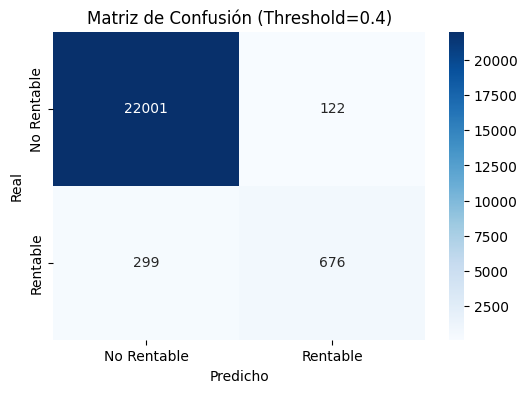

In [13]:
# Evaluación
print("Resultados con threshold =", nuevo_threshold)
print("Accuracy:", round(accuracy_score(y_test, y_pred_threshold), 4))
print("Precision:", round(precision_score(y_test, y_pred_threshold), 4))
print("Recall:", round(recall_score(y_test, y_pred_threshold), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_threshold), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred_proba), 4))  # AUC no cambia

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_threshold))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_threshold)


plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No Rentable', 'Rentable'], yticklabels=['No Rentable', 'Rentable'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión (Threshold={nuevo_threshold})')
plt.show()

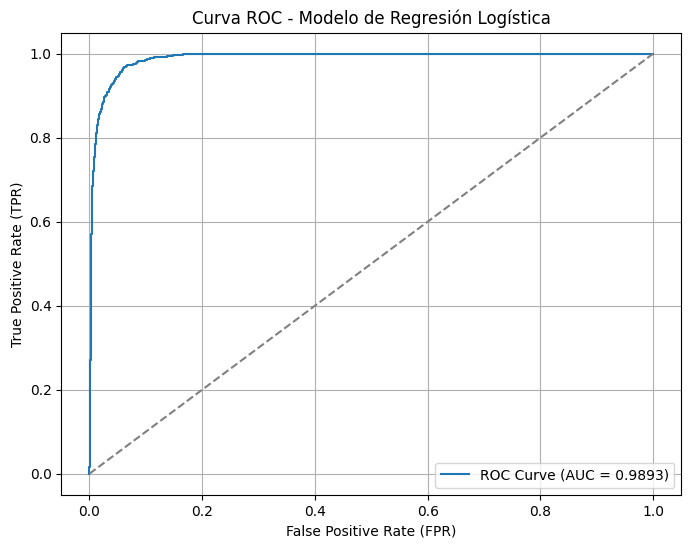

In [14]:
# Calcular fpr (false positive rate), tpr (true positive rate) y thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea aleatoria
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Modelo de Regresión Logística')
plt.legend()
plt.grid()
plt.show()

# Resultados de Experimentos - Predicción de Rentabilidad de Envíos

##  Objetivo
Evaluar distintas estrategias de modelado para mejorar la detección de paquetes rentables (`is_profitable = 1`) en un dataset logístico sintético.

---

##  Modelos Probados

| Experimento                    | Accuracy | Precision (1) | Recall (1) | F1 Score (1) | ROC AUC | Comentario |
|---------------------------------|----------|---------------|------------|-------------|---------|------------|
| **Modelo base (threshold = 0.5)**  | 97.99%   | 86.64%        | 61.85%     | 72.17%      | 0.9893  | Buen punto de partida |
| **Logistic Regression con `class_weight='balanced'`** | 95.80%   | 50.13%        | 98.97%     | 66.55%      | 0.9916  | Altísimo recall, precision muy baja |
| **Modelo base con threshold = 0.4** | 98.18%   | 84.71%        | 69.33%     | 76.25%      | 0.9893  | Mejor balance general (nueva baseline) |

---

##  Interpretación

- **Modelo Base (threshold 0.5):**  
  Buen Precision (86%), pero bajo Recall (62%).  
  Detecta muchos rentables, pero se pierde bastantes.

- **Modelo Balanced:**  
  Recall casi perfecto (99%), pero Precision muy baja (50%).  
  Detecta casi todos los rentables, pero comete muchos errores de predicción.

- **Modelo Threshold 0.4 (Mejor Actual):**  
  Excelente equilibrio entre Precision (85%) y Recall (69%).  
  F1 Score superior a los otros modelos (76%).

---

# Curva ROC - Evaluación del Modelo

La curva ROC representa el trade-off entre la tasa de verdaderos positivos (Recall) y la tasa de falsos positivos (False Positive Rate) a través de todos los posibles thresholds de decisión.

- El modelo de Regresión Logística alcanza un **AUC = 0.9893**, lo cual indica una **excelente capacidad de discriminación** entre paquetes rentables y no rentables.
- La curva se aproxima fuertemente al vértice superior izquierdo, mostrando que el modelo logra un **alto recall** con **bajo falso positivo rate** en la mayoría de los thresholds.
- Comparado con un modelo aleatorio (línea gris diagonal), este modelo demuestra **predicciones mucho mejores que el azar**.

---


##  Conclusión

Ajustar el **threshold de decisión** a **0.4** en el modelo base de Regresión Logística ofrece el mejor balance entre:

- Detectar la mayor cantidad posible de paquetes rentables (alto Recall),
- Mantener un buen nivel de precisión (bajo error en falsos positivos),
- Sin afectar drásticamente la precisión global del modelo.

Este modelo se define como la **nueva baseline para iteraciones futuras**.

---

